<h3> Customer Segmentation: A Brief Overview </h3>

Customer segmentation is an important technique in marketing and data analysis that involves dividing a customer base into distinct groups 
based on shared characteristics or behaviors. By identifying meaningful customer segments, businesses can tailor their marketing strategies, 
improve customer experiences, and optimize resource allocation.

Common Customer Segmentation Techniques include:
<li> Machine learning clustering algorithms like k-means, hierarchical clustering, and DBSCAN </li>
<li> Value-Based Segmentation (segments customers based on their lifetime value, profitability, or potential revenue generation) </li>
<li> RFM (segmenting customers based on three key dimensions Recency, Frequency and Monetary values), </li>
etc.

In this analysis, RFM approach is used. 
some of its advantages include:
1. Easy Interpretation: RFM scores are intuitive, making it easy for non-technical stakeholders to understand and act upon the findings.
2. Identifying High-Value Customers: RFM effectively identifies high-value customers, enabling businesses to prioritize their engagement and retention efforts.
3. Personalization: RFM segmentation enables personalized marketing, leading to higher customer satisfaction and improved brand loyalty.
4. Segmentation Flexibility: RFM can be adapted to various industries and business models, making it widely applicable.
5. Continuous Refinement: RFM analysis can be regularly updated and refined based on the latest customer data and business requirements.


In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# data source
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

# save the data in the variable df
df = pd.read_excel(url)

In [3]:
# first 5 rows of the data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# save a copy of the data
data_copy = df.copy()

.

<h3> Data Cleaning </h3>

`

In [5]:
print('Total rows in the dataframe:', len(df))

Total rows in the dataframe: 541909


In [6]:
# Function to check for null values and duplicates
def check_data(table):
    """
    Check for NaN and duplicate values in a pandas dataframe.
    Returns a dictionary containing the results.
    """
    results = {}

    # Check for NaN values
    if df.isnull().values.any():
        nan_count = df.isnull().sum().sum()
        results['NaN'] = f"{nan_count} NaN values found."
    else:
        results['NaN'] = "No NaN values found."

    # Check for duplicate values
    if df.duplicated().values.any():
        duplicate_count = df.duplicated().sum()
        results['Duplicates'] = f"{duplicate_count} duplicate values found."
    else:
        results['Duplicates'] = "No duplicate values found."

    return results

In [7]:
# apply the function to the dataframe, df
check_data(df)

{'NaN': '136534 NaN values found.',
 'Duplicates': '5268 duplicate values found.'}

In [8]:
# check out the Nan and the columns affected 
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# isolating CustomerID column
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


#### almost nothing can be done with CustomerID column with Nan, considering the RFM approach; 

In [10]:
# removing the Customers whose identities are not known
df.drop(df[df['CustomerID'].isna()].index, inplace=True)

In [11]:
# check once more if there are still Nan values in any column
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### evidently, getting rid of CustomerID column with Nan has taken care of Description column with Nan, as well

`

In [12]:
# examine the source of duplicates
df[df.duplicated(keep=False)].head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


##### duplicates noticed and flagged are largely because of invoiceNo and invoiceDate by same CustomerID

`

In [13]:
# dataframe data type information and more
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [14]:
# function to clean and normalize the string columns
def clean_description(description):
    # Convert to lowercase
    description = description.lower()
    
    # Remove leading and trailing whitespace
    description = description.strip()
    
    # Remove special characters
    description = re.sub('[^a-zA-Z0-9\s]', '', description)
    
    return description

In [15]:
# apply the function to Description and Country columns
df['Description'] = df['Description'].apply(clean_description)
df['Country'] = df['Country'].apply(clean_description)

In [16]:
# Convert InvoiceDate to datetime format, and CustomerID to object format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('object')

`

##### examining the number of unique countries in the Country column

In [17]:
print('Total number of unque countries in the data:', df['Country'].nunique())
df['Country'].unique()

Total number of unque countries in the data: 37


array(['united kingdom', 'france', 'australia', 'netherlands', 'germany',
       'norway', 'eire', 'switzerland', 'spain', 'poland', 'portugal',
       'italy', 'belgium', 'lithuania', 'japan', 'iceland',
       'channel islands', 'denmark', 'cyprus', 'sweden', 'austria',
       'israel', 'finland', 'greece', 'singapore', 'lebanon',
       'united arab emirates', 'saudi arabia', 'czech republic', 'canada',
       'unspecified', 'brazil', 'usa', 'european community', 'bahrain',
       'malta', 'rsa'], dtype=object)

In [18]:
# checking for the min and max date of countries in their transactions
# Group data by Country and find the first and last dates
country_dates = df.groupby('Country')['InvoiceDate'].agg(['min', 'max'])

country_dates['date_interval'] = (country_dates[min] - country_dates[max])

country_dates.sort_values(by='date_interval', ascending=False)

,min,max,date_interval
Country,,,
united kingdom,2010-12-01 08:26:00,2011-12-09 12:49:00,373 days 04:23:00
france,2010-12-01 08:45:00,2011-12-09 12:50:00,373 days 04:05:00
germany,2010-12-01 13:04:00,2011-12-09 12:16:00,372 days 23:12:00
norway,2010-12-01 13:24:00,2011-12-09 10:02:00,372 days 20:38:00
eire,2010-12-01 14:05:00,2011-12-08 15:54:00,372 days 01:49:00
netherlands,2010-12-01 11:27:00,2011-12-08 12:12:00,372 days 00:45:00
belgium,2010-12-03 16:35:00,2011-12-09 10:10:00,370 days 17:35:00
spain,2010-12-03 12:20:00,2011-12-07 17:05:00,369 days 04:45:00
portugal,2010-12-03 15:14:00,2011-12-07 15:56:00,369 days 00:42:00


##### As seen, not all countries have up to minimum of 6 months of InvoiceDate

##### The decision is to only work with countries with more than 6 months of invoiceDate interval, and to sieve out countries with InvoiceDate of minimum of 6 months (An alternative is to find the country which have been consistent for the past 6 months till date)

`

In [19]:
# number of columns and rows before removing countries with less than 6 months transactions interval
df.shape

(406829, 8)

In [20]:
# Group data by Country and find the first and last dates
#country_dates = df.groupby('Country')['InvoiceDate'].agg(['min', 'max'])

# Filter countries with less than 6 months interval
filtered_countries = country_dates[country_dates['max'] - country_dates['min'] >= pd.Timedelta(days=180)]

# Get the list of filtered countries
filtered_country_list = filtered_countries.index.tolist()

# Print the list of filtered countries
print("Countries with a minimum 6 months interval:")
print(filtered_country_list)
print('\n')
print('Total number of countries:',len(filtered_country_list))

Countries with a minimum 6 months interval:
['australia', 'austria', 'belgium', 'channel islands', 'cyprus', 'czech republic', 'denmark', 'eire', 'finland', 'france', 'germany', 'greece', 'iceland', 'israel', 'italy', 'japan', 'netherlands', 'norway', 'poland', 'portugal', 'singapore', 'spain', 'sweden', 'switzerland', 'united arab emirates', 'united kingdom', 'usa']


Total number of countries: 27


In [21]:
# filter the df based on the filtered countries
df = df[df['Country'].isin(filtered_country_list)]

# print the filtered DataFrame
print(df.shape)

(406049, 8)


`

In [22]:
# check the country
df['Country'].unique()

array(['united kingdom', 'france', 'australia', 'netherlands', 'germany',
       'norway', 'eire', 'switzerland', 'spain', 'poland', 'portugal',
       'italy', 'belgium', 'japan', 'iceland', 'channel islands',
       'denmark', 'cyprus', 'sweden', 'austria', 'israel', 'finland',
       'greece', 'singapore', 'united arab emirates', 'czech republic',
       'usa'], dtype=object)

`

In [23]:
# statistics of Quality and UnitPrice columns
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,406049.000000,406049,406049.000000
mean,12.064588,2011-07-10 17:25:09.985395968,3.458530
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 14:23:00,1.250000
50%,5.000000,2011-07-31 12:52:00,1.950000
75%,12.000000,2011-10-20 13:24:00,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,248.930171,NaN,69.376049


##### Based on df.info(), we need to examine why Quantity column has some negative number, UnitPrice column has 0.0  and the maximum values in both case

In [24]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,discount,-1,2010-12-01 09:41:00,27.50,14527.0,united kingdom
154,C536383,35004C,set of 3 coloured flying ducks,-1,2010-12-01 09:49:00,4.65,15311.0,united kingdom
235,C536391,22556,plasters in tin circus parade,-12,2010-12-01 10:24:00,1.65,17548.0,united kingdom
236,C536391,21984,pack of 12 pink paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,united kingdom
237,C536391,21983,pack of 12 blue paisley tissues,-24,2010-12-01 10:24:00,0.29,17548.0,united kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,zinc tlight holder stars small,-11,2011-12-09 09:57:00,0.83,14397.0,united kingdom
541541,C581499,M,manual,-1,2011-12-09 10:28:00,224.69,15498.0,united kingdom
541715,C581568,21258,victorian sewing box large,-5,2011-12-09 11:57:00,10.95,15311.0,united kingdom
541716,C581569,84978,hanging heart jar tlight holder,-1,2011-12-09 11:58:00,1.25,17315.0,united kingdom


In [25]:
# -ve Quantity can't be explained, it has to be removed... we don't have enough information as to why 
df.drop(df[df['Quantity'] < 0].index, inplace=True)

# check again where we have 
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


`

In [26]:
# rows and columns, thereafter
df.shape

(397161, 8)

##### likewise, we need to remove the instances where UnitPrice is 0.0

In [27]:
df.drop(df[df['UnitPrice'] == 0.0].index, inplace=True)

`

##### check the max values of both the Quantity and UnitPrice columns to check if they look like anomalies, based on df.describe() stats

In [28]:
df[df['Quantity'] == df['Quantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,paper craft little birdie,80995,2011-12-09 09:15:00,2.08,16446.0,united kingdom


<p>Maximum Quantity value does not suggest an anomaly figure;</p>

In [29]:
df[df['UnitPrice'] == df['UnitPrice'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,postage,1,2011-05-03 13:46:00,8142.75,16029.0,united kingdom


In [30]:
df[df['Description'] == 'postage'].head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,postage,3,2010-12-01 08:45:00,18.0,12583.0,france
386,536403,POST,postage,1,2010-12-01 11:27:00,15.0,12791.0,netherlands
1123,536527,POST,postage,1,2010-12-01 13:04:00,18.0,12662.0,germany


<p> <b>'Postage'</b> appears like courier charge for posting items bought by the customers, to customers</p>

`

In [31]:
# identify the top-selling products based on the number of units sold
top_products_by_units = df.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
top_products_by_units = top_products_by_units.sort_values(by='Quantity', ascending=False)

top_products_by_units.head(10)

,StockCode,Description,Quantity
2518,23843,paper craft little birdie,80995
2016,23166,medium ceramic top storage jar,77916
2694,84077,world war 2 gliders asstd designs,54127
3555,85099B,jumbo bag red retrospot,46171
3562,85123A,white hanging heart tlight holder,36719
2799,84879,assorted colour bird ornament,35332
357,21212,pack of 72 retrospot cake cases,33669
1031,22197,popcorn holder,30931
1922,23084,rabbit night light,27202
1306,22492,mini paint set vintage,26076


In [32]:
# Identify the top-selling products based on the total revenue generated
df['Revenue'] = df['UnitPrice'] * df['Quantity'] #Feature engineering: creating another column based on existing columns

top_products_by_revenue = df.groupby(['StockCode', 'Description'])['Revenue'].sum().reset_index()
top_products_by_revenue = top_products_by_revenue.sort_values(by='Revenue', ascending=False)

top_products_by_revenue.head(10)

,StockCode,Description,Revenue
2518,23843,paper craft little birdie,168469.60
1241,22423,regency cakestand 3 tier,142086.25
3562,85123A,white hanging heart tlight holder,100430.45
3555,85099B,jumbo bag red retrospot,85199.98
2016,23166,medium ceramic top storage jar,81416.73
3882,POST,postage,76457.02
2596,47566,party bunting,68754.78
2799,84879,assorted colour bird ornament,56529.64
3880,M,manual,53779.93
1922,23084,rabbit night light,51346.20


In [33]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

`

<h3> RFM (Recency, Frequency and Monetary) Analysis </h3>

In [34]:
df[df['CustomerID']==12347.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
14938,537626,85116,black candelabra tlight holder,12,2010-12-07 14:57:00,2.10,12347.0,iceland,25.20
14939,537626,22375,airline bag vintage jet set brown,4,2010-12-07 14:57:00,4.25,12347.0,iceland,17.00
14940,537626,71477,colour glass star tlight holder,12,2010-12-07 14:57:00,3.25,12347.0,iceland,39.00
14941,537626,22492,mini paint set vintage,36,2010-12-07 14:57:00,0.65,12347.0,iceland,23.40
14942,537626,22771,clear drawer knob acrylic edwardian,12,2010-12-07 14:57:00,1.25,12347.0,iceland,15.00
...,...,...,...,...,...,...,...,...,...
535010,581180,20719,woodland charlotte bag,10,2011-12-07 15:52:00,0.85,12347.0,iceland,8.50
535011,581180,21265,pink goose feather tree 60cm,12,2011-12-07 15:52:00,1.95,12347.0,iceland,23.40
535012,581180,23271,christmas table silver candle spike,16,2011-12-07 15:52:00,0.83,12347.0,iceland,13.28
535013,581180,23506,mini playing cards spaceboy,20,2011-12-07 15:52:00,0.42,12347.0,iceland,8.40


In [35]:
# the difference of the actual data (df) last day of purchase and each customer's last date of purchase
(df['InvoiceDate'].max() - pd.to_datetime(df['InvoiceDate'])).dt.days

0         373
1         373
2         373
3         373
4         373
         ... 
541904      0
541905      0
541906      0
541907      0
541908      0
Name: InvoiceDate, Length: 397122, dtype: int64

In [36]:
## The choice of date is the last date a customer purchased, and then the last transaction date
## The approach used here could be different for another RFM analysis, depending on the business requirement

In [37]:
# the three columns necessary to create the RFM analysis 

last_date = df['InvoiceDate'].max() # Get the last recorded date of transaction

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'count',
    'Revenue': 'sum'
})

In [38]:
# the new table grouping the unique customer based on InvoiceDate, InvoiceNo and Revenue
rfm

,InvoiceDate,InvoiceNo,Revenue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [39]:
rfm.shape

(4320, 3)

<p>So far, this suggests 4,320 unique customers with with their respective <b>Recency</b> (time of last buy), <b>Frequency</b> (how often) and <b>Amount</b> spent buying  </p>

In [40]:
# rename the columns to reflect the analysis
rfm.columns = ['Recency', 'Frequency', 'Monetary']

`

<h4>Assign RFM scores (the columns) or categories based on the metrics </h4> 
<p>Opting for creating 7 quartiles; this is not cast in stone; preference of quartles
should depend on the type of business, insights from the data and may be, decision makers</p>

In [41]:
# Here, we'll use quartiles to assign scores from 1 to 7 now, and thereby creating 3 additional columns
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=7, labels=False, duplicates='drop') + 1
rfm['F_Score'] = pd.qcut(rfm['Frequency'], q=7, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=7, labels=False, duplicates='drop') + 1

In [42]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346.0,325,1,77183.60,7,1,7
12347.0,1,182,4310.00,1,7,7
12348.0,74,31,1797.24,5,3,6
12349.0,18,73,1757.55,2,5,6
12350.0,309,17,334.40,7,2,2


<p>Next, we will combine the quartiles assigned under each of the RFM columns and then sum accordingly</p>

In [43]:
# Calculate RFM Segment and RFM Score; two more columns will be created
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [44]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,7,1,7,717,15
12347.0,1,182,4310.00,1,7,7,177,15
12348.0,74,31,1797.24,5,3,6,536,14
12349.0,18,73,1757.55,2,5,6,256,13
12350.0,309,17,334.40,7,2,2,722,11


<p>Based on <b>RFM_Score (rating)</b>, we will then segment the rating into classes: 6 in all</p>

In [45]:
# Adjust RFM scores to create 6 categories
rfm['RFM_Score_Category'] = pd.cut(rfm['RFM_Score'], bins=[1, 4, 7, 10, 13, 16, 19, 21], labels=False, right=True)

In [46]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,7,1,7,717,15,4
12347.0,1,182,4310.00,1,7,7,177,15,4
12348.0,74,31,1797.24,5,3,6,536,14,4
12349.0,18,73,1757.55,2,5,6,256,13,3
12350.0,309,17,334.40,7,2,2,722,11,3


`

In [47]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Recency             4320 non-null   int64  
 1   Frequency           4320 non-null   int64  
 2   Monetary            4320 non-null   float64
 3   R_Score             4320 non-null   int64  
 4   F_Score             4320 non-null   int64  
 5   M_Score             4320 non-null   int64  
 6   RFM_Segment         4320 non-null   object 
 7   RFM_Score           4320 non-null   int64  
 8   RFM_Score_Category  4320 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 337.5+ KB


In [48]:
# sorting the table based on some columns, greatest to the least
rfm = rfm.sort_values(by=['R_Score','F_Score','M_Score','RFM_Score_Category'], ascending=False)
rfm

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category
CustomerID,,,,,,,,,
15808.0,305,208,3734.97,7,7,7,777,21,6
17850.0,371,297,5391.21,7,7,7,777,21,6
14669.0,241,170,1269.99,7,7,5,775,19,5
13093.0,275,159,7832.47,7,6,7,767,20,6
12501.0,336,149,2169.39,7,6,6,766,19,5
...,...,...,...,...,...,...,...,...,...
16789.0,7,5,80.80,1,1,1,111,3,0
16988.0,4,7,126.12,1,1,1,111,3,0
17737.0,8,10,168.24,1,1,1,111,3,0


In [49]:
rfm['RFM_Score_Category'].unique()

array([6, 5, 4, 3, 2, 1, 0], dtype=int64)

In [50]:
# the very tail end of the rfm table
rfm.tail(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category
CustomerID,,,,,,,,,
14865.0,6,4,52.20,1,1,1,111,3,0
15992.0,3,3,41.99,1,1,1,111,3,0
16569.0,2,5,124.20,1,1,1,111,3,0
16597.0,3,7,90.04,1,1,1,111,3,0
16620.0,3,9,178.96,1,1,1,111,3,0
16789.0,7,5,80.80,1,1,1,111,3,0
16988.0,4,7,126.12,1,1,1,111,3,0
17737.0,8,10,168.24,1,1,1,111,3,0
17942.0,7,2,77.50,1,1,1,111,3,0


`

In [51]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category
CustomerID,,,,,,,,,
15808.0,305,208,3734.97,7,7,7,777,21,6
17850.0,371,297,5391.21,7,7,7,777,21,6
14669.0,241,170,1269.99,7,7,5,775,19,5
13093.0,275,159,7832.47,7,6,7,767,20,6
12501.0,336,149,2169.39,7,6,6,766,19,5


In [52]:
rfm.tail(15)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category
CustomerID,,,,,,,,,
18273.0,1,3,204.00,1,1,2,112,4,0
12587.0,7,4,144.00,1,1,1,111,3,0
14219.0,3,7,89.94,1,1,1,111,3,0
14287.0,7,9,176.63,1,1,1,111,3,0
14354.0,5,9,163.62,1,1,1,111,3,0
14865.0,6,4,52.20,1,1,1,111,3,0
15992.0,3,3,41.99,1,1,1,111,3,0
16569.0,2,5,124.20,1,1,1,111,3,0
16597.0,3,7,90.04,1,1,1,111,3,0


In [53]:
# function to print specify how many each category has
def print_groupby_result(groupby_result):
    for index, count in groupby_result.items():
        print("Category",index, 'has', count, 'Customers')
        #print("Count:", count)

grouped = rfm.groupby('RFM_Score_Category')['RFM_Score_Category'].count()
print_groupby_result(grouped)

Category 0 has 48 Customers
Category 1 has 342 Customers
Category 2 has 1083 Customers
Category 3 has 1331 Customers
Category 4 has 1203 Customers
Category 5 has 306 Customers
Category 6 has 7 Customers


<p>The data we cleaned has the above categories: while category 0 is the least promising, category 5 is the best category of all customers</p>

In [54]:
rfm[rfm['RFM_Score_Category'] == 0]

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category
CustomerID,,,,,,,,,
12966.0,9,10,160.18,2,1,1,211,4,0
12984.0,18,4,97.50,2,1,1,211,4,0
13188.0,10,2,114.60,2,1,1,211,4,0
13403.0,17,3,75.00,2,1,1,211,4,0
13638.0,15,8,122.64,2,1,1,211,4,0
13832.0,18,3,52.20,2,1,1,211,4,0
14300.0,18,3,43.20,2,1,1,211,4,0
14551.0,17,10,186.23,2,1,1,211,4,0
14768.0,16,5,192.60,2,1,1,211,4,0


<p>This is evident based on RFM scores from above table; long-dated <b>Recency</b>, low <b>Frequency</b> in patronage, and lastly quite small <b>Monetary</b> value. </p>

`

<p><b>Based on this, either in 0 or 5 class, Customer could come from any country; this classification is just to which customers are actually doing the best based on the ranks</b></p>

In [55]:
# merge the countries of each of the Customers from the dataframe (df), and join to rfm table
Customer_countries = df[['CustomerID','Country']].drop_duplicates().set_index('CustomerID')
Customer_countries

,Country
CustomerID,
17850.0,united kingdom
13047.0,united kingdom
12583.0,france
13748.0,united kingdom
15100.0,united kingdom
...,...
13436.0,united kingdom
15520.0,united kingdom
13298.0,united kingdom


<p>Note that the rows are about 4328 </p>

In [56]:
# we need to join this Customer_countries table to rfm
rfm_plus_country = rfm.join(Customer_countries, on='CustomerID', how='left')
rfm_plus_country

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category,Country
CustomerID,,,,,,,,,,
15808.0,305,208,3734.97,7,7,7,777,21,6,united kingdom
17850.0,371,297,5391.21,7,7,7,777,21,6,united kingdom
14669.0,241,170,1269.99,7,7,5,775,19,5,united kingdom
13093.0,275,159,7832.47,7,6,7,767,20,6,united kingdom
12501.0,336,149,2169.39,7,6,6,766,19,5,germany
...,...,...,...,...,...,...,...,...,...,...
16789.0,7,5,80.80,1,1,1,111,3,0,united kingdom
16988.0,4,7,126.12,1,1,1,111,3,0,united kingdom
17737.0,8,10,168.24,1,1,1,111,3,0,united kingdom


In [57]:
print('The rows, columns shape for rfm:',rfm.shape)
print('The rows, columns shape for rfm_plus_country:',rfm_plus_country.shape)

The rows, columns shape for rfm: (4320, 9)
The rows, columns shape for rfm_plus_country: (4328, 10)


`

<p>There is need to probe why the discrepancy in the two dataframes: <b>rfm</b> and <b>rfm_plus_country</b></p>

In [58]:
rfm_plus_country.index[rfm_plus_country.index.duplicated(keep=False)]

Index([12455.0, 12455.0, 12457.0, 12457.0, 12422.0, 12422.0, 12370.0, 12370.0,
       12394.0, 12394.0, 12431.0, 12431.0, 12417.0, 12417.0, 12429.0, 12429.0],
      dtype='float64', name='CustomerID')

<p>We have duplicated index based on the above</p>

`

In [59]:
# examine the actual rows with duplicated index
rfm_plus_country[rfm_plus_country.index.duplicated(keep=False)]

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category,Country
CustomerID,,,,,,,,,,
12455.0,72,90,2466.86,5,6,6,566,17,5,cyprus
12455.0,72,90,2466.86,5,6,6,566,17,5,spain
12457.0,65,62,2363.23,5,5,6,556,16,4,switzerland
12457.0,65,62,2363.23,5,5,6,556,16,4,cyprus
12422.0,95,39,803.56,5,4,4,544,13,3,australia
12422.0,95,39,803.56,5,4,4,544,13,3,switzerland
12370.0,50,167,3545.69,4,7,7,477,18,5,cyprus
12370.0,50,167,3545.69,4,7,7,477,18,5,austria
12394.0,63,27,1272.48,4,3,5,435,12,3,belgium


<p>This is a case where a CustomerID is seen to have come from more than one Country</p>

In [60]:
# check one of the CustomerIDs with duplicates to see the records from the foremost df table:
df[df.CustomerID == 12455.0][['InvoiceDate','Description','Quantity','UnitPrice','Country']]

,InvoiceDate,Description,Quantity,UnitPrice,Country
91370,2011-02-16 09:56:00,blue coat rack paris fashion,3,4.95,cyprus
91371,2011-02-16 09:56:00,red coat rack paris fashion,3,4.95,cyprus
91372,2011-02-16 09:56:00,candleholder pink hanging heart,32,2.55,cyprus
91373,2011-02-16 09:56:00,hanging jam jar tlight holder,96,0.72,cyprus
91374,2011-02-16 09:56:00,colour glass tlight holder hanging,64,0.65,cyprus
...,...,...,...,...,...
363255,2011-09-27 15:31:00,pack of 72 retrospot cake cases,24,0.55,spain
363256,2011-09-27 15:31:00,pack of 72 skull cake cases,24,0.55,spain
363257,2011-09-27 15:31:00,party invites woodland,12,0.85,spain
363258,2011-09-27 15:31:00,set of 60 vintage leaf cake cases,24,0.55,spain


In [61]:
# check for the same CustomerID (12455.0) in the rfm_plus_country
rfm_plus_country[rfm_plus_country.index == 12455.0]

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category,Country
CustomerID,,,,,,,,,,
12455.0,72,90,2466.86,5,6,6,566,17,5,cyprus
12455.0,72,90,2466.86,5,6,6,566,17,5,spain


<p>It seems such individual customers moved from a former location to another, but yet the ID remains the same, the RFM analysis scores the Customer the same, regardless of changed demography. <p><b>We can decide to remove either first or the second occurence from the table, since a single row can as well represent the score of the customer</p></b></p>



In [62]:
# remove the second occurence of such CustomerIDs, and reset the index
rfm_plus_country = rfm_plus_country.reset_index().drop_duplicates('CustomerID', keep='first')
rfm_plus_country

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category,Country
0,15808.0,305,208,3734.97,7,7,7,777,21,6,united kingdom
1,17850.0,371,297,5391.21,7,7,7,777,21,6,united kingdom
2,14669.0,241,170,1269.99,7,7,5,775,19,5,united kingdom
3,13093.0,275,159,7832.47,7,6,7,767,20,6,united kingdom
4,12501.0,336,149,2169.39,7,6,6,766,19,5,germany
...,...,...,...,...,...,...,...,...,...,...,...
4323,16789.0,7,5,80.80,1,1,1,111,3,0,united kingdom
4324,16988.0,4,7,126.12,1,1,1,111,3,0,united kingdom
4325,17737.0,8,10,168.24,1,1,1,111,3,0,united kingdom
4326,17942.0,7,2,77.50,1,1,1,111,3,0,united kingdom


.

In [63]:
# the category of CustomerID by country count
rfm_plus_country.groupby(['Country', 'RFM_Score_Category'])['RFM_Score_Category'].count().head(10)

Country    RFM_Score_Category
australia  2                      1
           3                      3
           4                      3
           5                      2
austria    2                      2
           3                      3
           4                      4
belgium    2                      4
           3                      6
           4                     12
Name: RFM_Score_Category, dtype: int64

In [64]:
# unique countries
print(rfm_plus_country['Country'].unique())

# pick on any country to see the ranks of the Category
rfm_plus_country.groupby(['Country', 'RFM_Score_Category'])['RFM_Score_Category'].count().sort_values(
    ascending=False)['united kingdom']

['united kingdom' 'germany' 'japan' 'switzerland' 'spain' 'italy' 'france'
 'greece' 'united arab emirates' 'cyprus' 'portugal' 'belgium' 'finland'
 'sweden' 'usa' 'austria' 'channel islands' 'norway' 'australia'
 'netherlands' 'eire' 'israel' 'poland' 'denmark' 'singapore'
 'czech republic' 'iceland']


RFM_Score_Category
3    1213
4    1070
2    1007
1     322
5     258
0      45
6       5
Name: RFM_Score_Category, dtype: int64

In [65]:
# Under probation!!! to use

def count_countries_by_segment(rfm_plus_country, max_segment):
    counts = {}
    for segment in range(max_segment + 1):
        segment_data = rfm_plus_country[rfm_plus_country['RFM_Score_Category'] == segment]
        counts[segment] = segment_data['Country'].nunique()
    return counts

counts = count_countries_by_segment(rfm_plus_country, 6)
counts

{0: 4, 1: 12, 2: 20, 3: 21, 4: 25, 5: 17, 6: 3}

`

<h3>Visualization</h3>

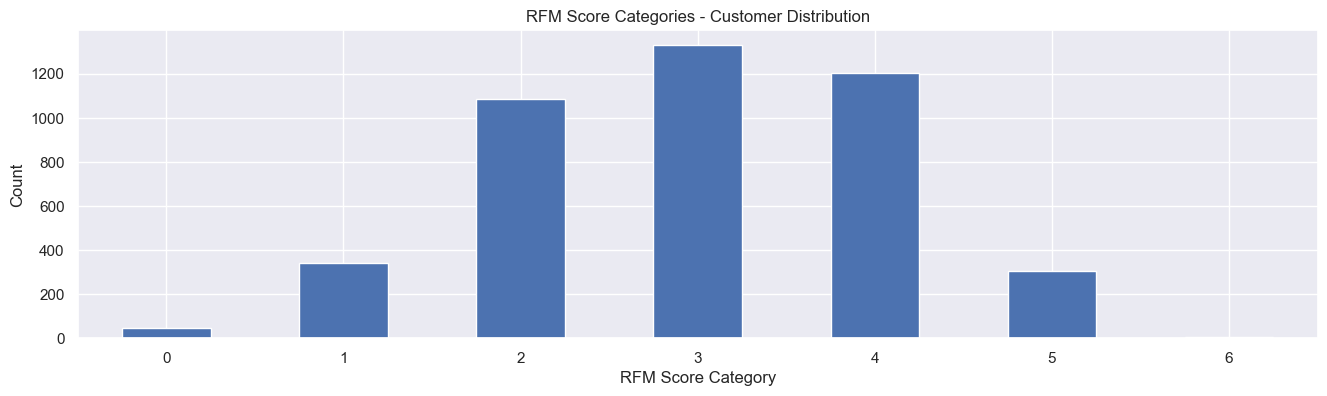

In [66]:
# use the grouped 
grouped = rfm.groupby('RFM_Score_Category')['RFM_Score_Category'].count()

# Plotting the segment counts
plt.figure(figsize=(16, 4))
grouped.plot(kind='bar')
plt.xlabel('RFM Score Category')
plt.ylabel('Count')
plt.title('RFM Score Categories - Customer Distribution')
plt.xticks(rotation=360)
plt.show()

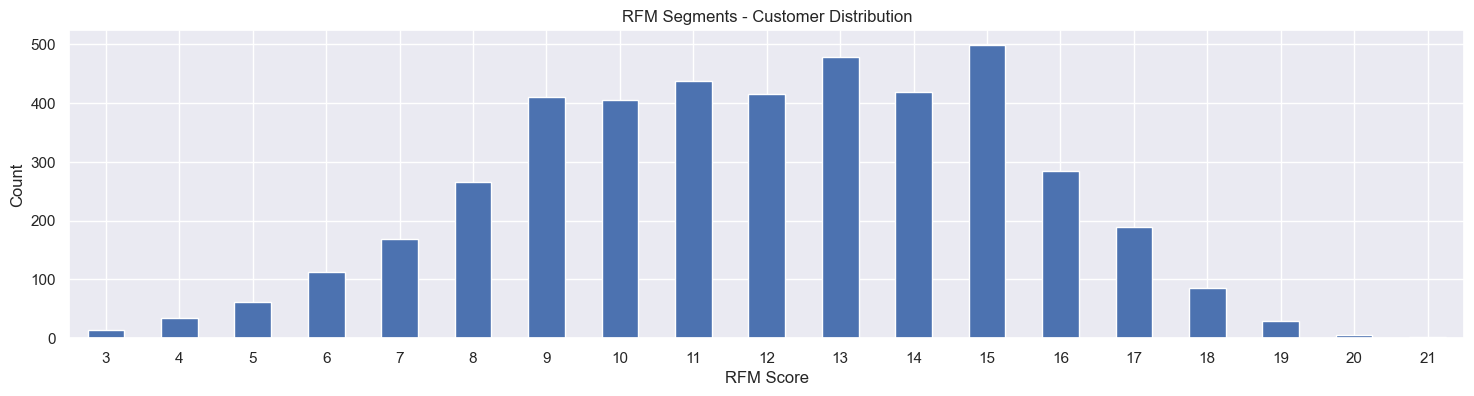

In [67]:
grouped_RFM_Score = rfm.groupby('RFM_Score')['RFM_Score'].count()

# Plotting the segment counts
plt.figure(figsize=(18, 4))
grouped_RFM_Score.plot(kind='bar')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.title('RFM Segments - Customer Distribution')
plt.xticks(rotation=360)
plt.show()

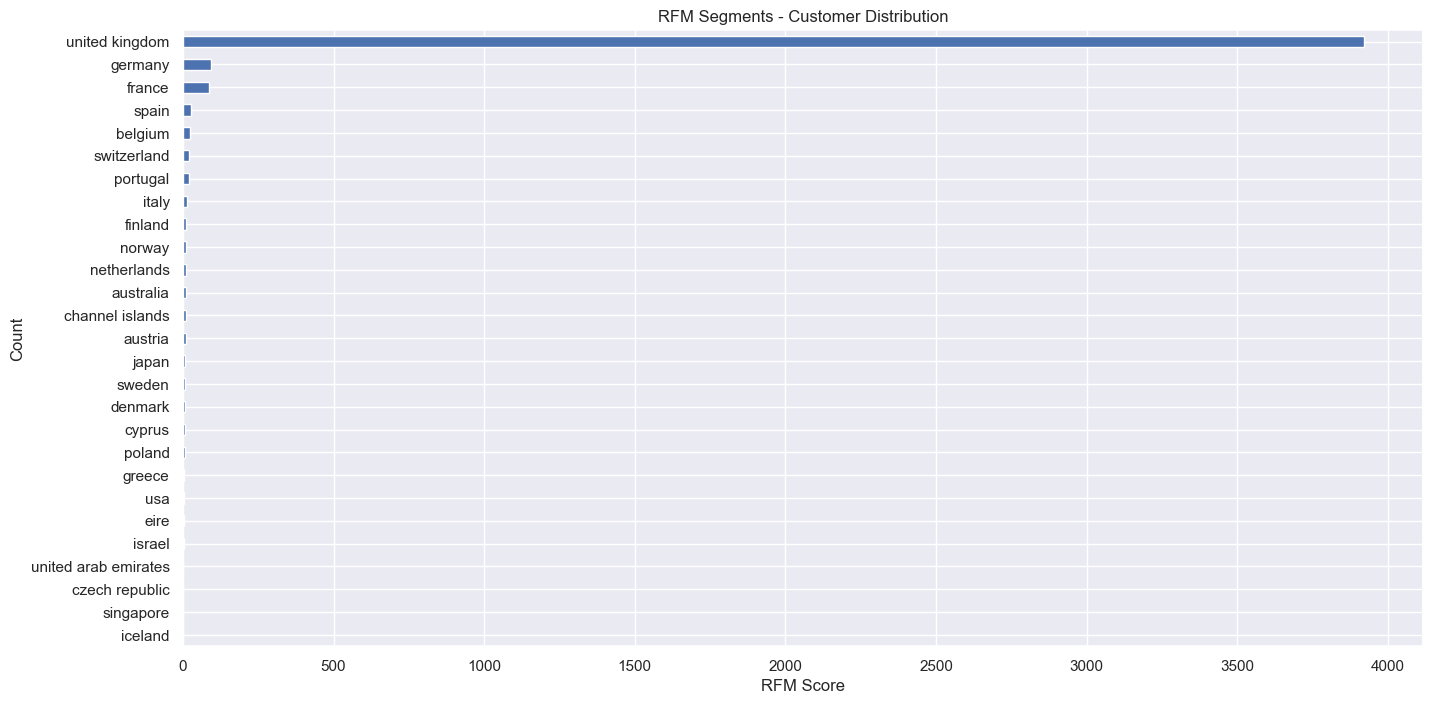

In [68]:
# group the countries
grouped_countries = rfm_plus_country['Country'].value_counts(ascending=True)

# Plotting the segment counts
plt.figure(figsize=(16, 8))
grouped_countries.plot(kind='barh')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.title('RFM Segments - Customer Distribution')
plt.xticks(rotation=360)
plt.show()

<p>The <b>United Kingdom</b> has by far the largest customer base</p>

`

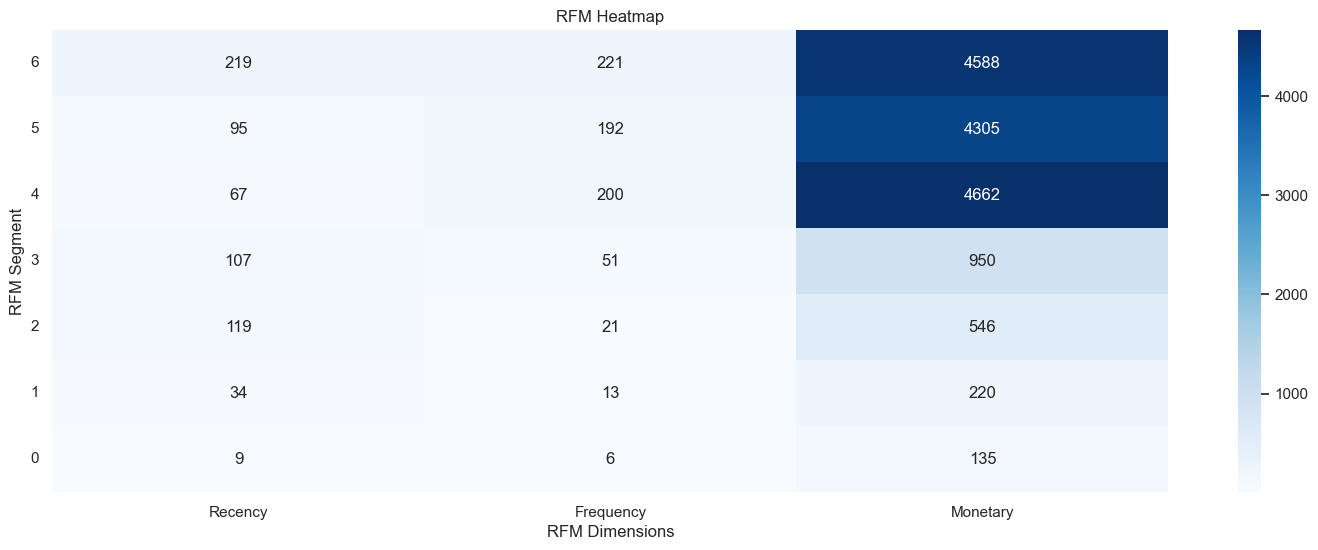

In [69]:
# calculating average RFM scores for each segment, 0 to 5
rfm_segment_avg = rfm_plus_country.groupby('RFM_Score_Category').agg({'Recency': 'mean', 
                                                                    'Frequency': 'mean', 'Monetary': 'mean'})
# plotting RFM Heatmap
plt.figure(figsize=(18, 6))
ax = sns.heatmap(rfm_segment_avg, cmap='Blues', annot=True, fmt='.0f', cbar=True)
ax.invert_yaxis()
plt.xlabel('RFM Dimensions')
plt.ylabel('RFM Segment')
plt.title('RFM Heatmap')
plt.yticks(rotation=360)
plt.show()

In [70]:
rfm_plus_country.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,RFM_Score_Category,Country
0,15808.0,305,208,3734.97,7,7,7,777,21,6,united kingdom
1,17850.0,371,297,5391.21,7,7,7,777,21,6,united kingdom
2,14669.0,241,170,1269.99,7,7,5,775,19,5,united kingdom
3,13093.0,275,159,7832.47,7,6,7,767,20,6,united kingdom
4,12501.0,336,149,2169.39,7,6,6,766,19,5,germany


In [71]:
# function to count the countries in each of the RFM_Score_Category
def count_countries_by_segment(data, segment):
    segment_data = data[data['RFM_Score_Category'] == segment]
    segment_count = segment_data['Country'].nunique()
    country_counts = segment_data['Country'].value_counts()
    
    print(f"Total Countries in Segment {segment} is: {segment_count}\n")
    print("Country Counts:\n")
    print(country_counts)

In [72]:
# check few segments and the countries count
count_countries_by_segment(rfm_plus_country, 0)
print('\n')
count_countries_by_segment(rfm_plus_country, 1)
print('\n')

Total Countries in Segment 0 is: 4

Country Counts:

Country
united kingdom    45
denmark            1
spain              1
finland            1
Name: count, dtype: int64


Total Countries in Segment 1 is: 12

Country Counts:

Country
united kingdom    322
germany             4
france              4
netherlands         2
finland             2
italy               2
sweden              1
japan               1
poland              1
spain               1
portugal            1
usa                 1
Name: count, dtype: int64




In [73]:
count_countries_by_segment(rfm_plus_country, 5)
print('\n')
count_countries_by_segment(rfm_plus_country, 6)

Total Countries in Segment 5 is: 17

Country Counts:

Country
united kingdom     258
germany             13
france               6
switzerland          5
spain                4
cyprus               3
channel islands      3
finland              2
belgium              2
japan                2
australia            2
portugal             1
israel               1
singapore            1
norway               1
italy                1
poland               1
Name: count, dtype: int64


Total Countries in Segment 6 is: 3

Country Counts:

Country
united kingdom    5
switzerland       1
eire              1
Name: count, dtype: int64


In [74]:
def count_countries_by_segment(rfm_plus_country, max_segment):
    counts = {}
    for segment in range(max_segment + 1):
        segment_data = rfm_plus_country[rfm_plus_country['RFM_Score_Category'] == segment]
        counts[segment] = segment_data['Country'].nunique()
    
    # Plotting
    segments = list(counts.keys())
    country_counts = list(counts.values())
    
    plt.bar(segments, country_counts)
    plt.xlabel('Segment')
    plt.ylabel('Country Count')
    plt.title('Country Count by Segment')
    plt.show()
    
    return counts

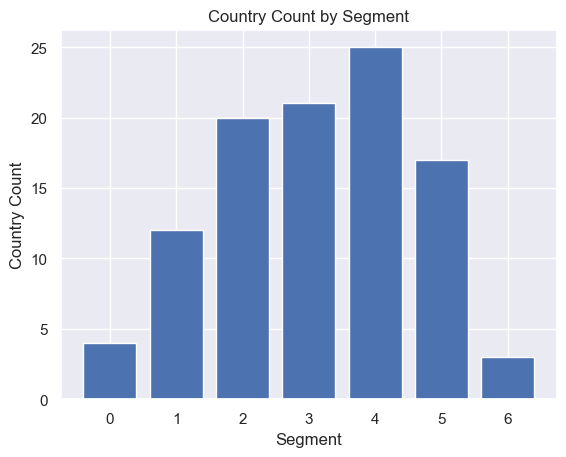

{0: 4, 1: 12, 2: 20, 3: 21, 4: 25, 5: 17, 6: 3}


In [75]:
# Country counts in each segment
counts = count_countries_by_segment(rfm_plus_country, 6)
print(counts)

<h3>Customer RFM Analysis: Observations and Recommendations Based on The Analysis</h3>
<br>
<br>

<table>
  <tr>
    <th>RFM_Segment</th>
    <th>Segment Rating</th>
    <th>Segment Name</th>
    <th>Advice</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Low Recency, Low Frequency, Low Monetary</td>
    <td>Least Engaged</td>
    <td>Focus on re-engagement strategies and personalized promotions to increase loyalty and spending.</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Medium Recency, Low Frequency, Low-Moderate Monetary</td>
    <td>Potential Churn</td>
    <td>Implement targeted win-back campaigns and special offers to encourage more frequent purchases.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Medium Recency, Medium-High Frequency, Moderate Monetary</td>
    <td>Opportunity Target</td>
    <td>Focus on upselling and cross-selling to increase the average transaction value.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Medium Recency, High Frequency, High Monetary</td>
    <td>Loyal Customers</td>
    <td>Prioritize excellent customer service, exclusive rewards, and personalized offerings to retain loyalty.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Medium Recency, Very High Frequency, Very High Monetary</td>
    <td>High Potential</td>
    <td>Provide VIP treatment, exclusive benefits, and premium offers to maintain loyalty.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Medium Recency, Very High Frequency, Very High Monetary</td>
    <td>Best Performers</td>
    <td>Continue excellent service, acknowledge loyalty, and offer special rewards for a better customer experience.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>High Recency, Very High Frequency, Very High Monetary</td>
    <td>Most Promising</td>
    <td>Personalize offerings, anticipate needs, and ensure a seamless customer experience to maintain loyalty.</td>
  </tr>
</table>
